##Problema das Oito Rainhas

O objetivo é dispor oito rainhas em um tabuleiro de xadrez 8x8 de modo que nenhuma delas se ataque.

####Módulos

In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from time import perf_counter


###Algoritmo *Stochastic Hill Climbing*

####Constantes

In [ ]:
MAX_FITNESS = 28
ITERATIONS_RANGE = 50
NUM_QUEENS = 8
BOARD_WIDTH = 8

In [ ]:
def fitness_function(board):
    '''
    Função objetivo: avalia a qualidade da solução candidata
    retornando o número de pares de rainhas que não se atacam
    '''
    n = BOARD_WIDTH
    c = MAX_FITNESS

    row_frequency = [0] * n
    main_diag_frequency = [0] * (2*n)
    sec_diag_frequency = [0] * (2*n)

    for col in range(n):
        row_frequency[board[col]] += 1
        main_diag_frequency[board[col] + col] += 1
        sec_diag_frequency[n - board[col] + col] += 1

    attacks = 0
    
    for i in range(2*n):
        if i < n:
            attacks += (row_frequency[i] * (row_frequency[i]-1)) 
        
        attacks += ((main_diag_frequency[i] * (main_diag_frequency[i]-1)) 
                    + (sec_diag_frequency[i] * (sec_diag_frequency[i]-1)))
    
    # O número de pares de rainhas atacantes é calculado pela 
    # fórmula (R * (R - 1)) / 2, a qual é utilizada para calcular 
    # o nº de arestas num grafo completo com R vértices, o qual 
    # representa a relação entre as rainhas que atacam umas às outras     
    return int(c - attacks/2)

In [ ]:
def print_board(board: list) -> None:
    '''
    Função que imprime na saída o tabuleiro 
    representado por um indivíduo.
    '''

    matrix = [["■" for i in range(NUM_QUEENS)] for j in range(NUM_QUEENS)]

    for index, queen in enumerate(board):
        col, lin = index, 7-queen
        matrix[lin][col] = "R"

    print("Tabuleiro:\n")
    print('\n'.join([''.join(['{:3}'.format(item) for item in row]) 
      for row in matrix]))


def movement(board: list, seen: set) -> list:
    '''
    Função que retorna uma lista com os vizinhos
    de um estado, mas que leva em consideração apenas
    os que se encaixam na heurística utilizada (rainhas 
    ocupam a mesma coluna nem a mesma linha)
    '''

    neighbors = []
    
    for col, lin in itertools.product(range(8), range(8)):
        copy_board = [x for x in board]
        
        if lin != copy_board[col]:
            copy_board[col] = lin

            if tuple(copy_board) not in seen:
              neighbors.append(copy_board)
        
        else:
            continue

    return neighbors
      

def hill_climbing() -> tuple:
    '''
    Função que performa o algoritimo Stochastic Hill-Climbing, 
    retornando um estado que seja melhor que todos os
    seus vizinhos
    '''

    board = rd.sample(range(8), 8)
    current = [y for y in board]
    iterations = 0
    is_max = None # Flag que indica se estado é um máximo local/global
    seen = set()  # Conjunto de estados visitados durante a execução do algoritmo

    while True:
        
        neighbors = movement(current, seen)
        neighbor = rd.choice(neighbors)
        
        seen.add(tuple(neighbor))       
        
        while True:
            
            if fitness_function(neighbor) >= fitness_function(current):
                current = neighbor
                break

            else:
                neighbors.remove(neighbor)

                if neighbors:
                    neighbor = rd.choice(neighbors)
                    seen.add(tuple(neighbor))

                else:
                    is_max = True
                    break
        
        iterations += 1
        
        if is_max:
            return current, fitness_function(current), iterations


res = hill_climbing()

if res[1] == 28:
    print(f"Solução máxima global encontrada: ")

else:
    print("Melhor solução:")
print(f"\nIndivíduo: {res[0]}\nFitness: {res[1]}\n\
Nº de iterações realizadas: {res[2]}\n")
print_board(res[0]) 

Melhor solução:

Indivíduo: [2, 6, 3, 7, 0, 4, 5, 1]
Fitness: 27
Nº de iterações realizadas: 11

Tabuleiro:

■  ■  ■  R  ■  ■  ■  ■  
■  R  ■  ■  ■  ■  ■  ■  
■  ■  ■  ■  ■  ■  R  ■  
■  ■  ■  ■  ■  R  ■  ■  
■  ■  R  ■  ■  ■  ■  ■  
R  ■  ■  ■  ■  ■  ■  ■  
■  ■  ■  ■  ■  ■  ■  R  
■  ■  ■  ■  R  ■  ■  ■  


Média dos números de iterações: 25.48
Desvio padrão dos números de iterações: 13.23

Média dos tempos de execução: 0.007247312420058733
Desvio padrão dos tempos de execução: 0.00459659


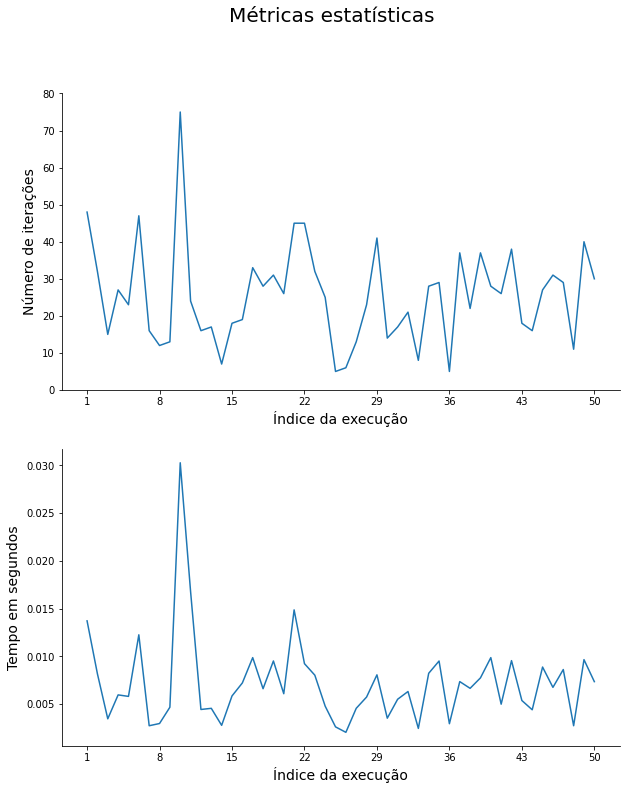

In [ ]:
def plot_metrics_curves() -> None:
    '''
    Função que realiza testes de execução do algoritmo e
    exibe dados e gráficos estatísticos sobre os testes
    '''
    execution_times = []
    iterations = []

    for _ in range(50):
        t_start = perf_counter()
        num_itr = hill_climbing()[2]
        t_end = perf_counter()

        execution_times.append(t_end - t_start)
        iterations.append(num_itr)

    fig, axs = plt.subplots(2, figsize=(10,12))
    fig.suptitle("Métricas estatísticas", fontsize=20) 

    for ax in axs:
        ax.set_xticks(np.arange(0,50,7))
        ax.set_xticklabels(np.arange(1,51,7))

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    itr_ylim = int(np.ceil(max(iterations) / 10.0)) * 10    
    
    axs[0].set_yticks(np.arange(0,itr_ylim+1,10))
    axs[0].set_ylim(bottom=0, top=itr_ylim)
   
    axs[0].set_ylabel("Número de iterações", fontsize=14, labelpad=5)
    axs[0].set_xlabel("Índice da execução", fontsize=14)

    axs[1].set_ylabel("Tempo em segundos", fontsize=14, labelpad=5)
    axs[1].set_xlabel("Índice da execução", fontsize=14)

    axs[0].plot(iterations)
    axs[1].plot(execution_times)


    print(f"Média dos números de iterações: {np.mean(iterations)}")
    print(f"Desvio padrão dos números de iterações: {np.std(iterations):.2f}")
    print()
    print(f"Média dos tempos de execução: {np.mean(execution_times)}")
    print(f"Desvio padrão dos tempos de execução: {np.std(execution_times):.8f}")
    
    
    plt.subplots_adjust(hspace=0.2)

    plt.rcParams["figure.figsize"] = (5,5)
    plt.show()

plot_metrics_curves()